In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Read the dataset

In [2]:
df = pd.read_csv('Job_Placement_data.csv')
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [3]:
df.isnull().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.dtypes

gender                  object
ssc_percentage         float64
ssc_board               object
hsc_percentage         float64
hsc_board               object
hsc_subject             object
degree_percentage      float64
undergrad_degree        object
work_experience         object
emp_test_percentage    float64
specialisation          object
mba_percent            float64
status                  object
dtype: object

In [6]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [8]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['gender', 'ssc_board', 'hsc_board', 'hsc_subject', 'undergrad_degree',
       'work_experience', 'specialisation', 'status'],
      dtype='object')
Index(['ssc_percentage', 'hsc_percentage', 'degree_percentage',
       'emp_test_percentage', 'mba_percent'],
      dtype='object')


### Countplot

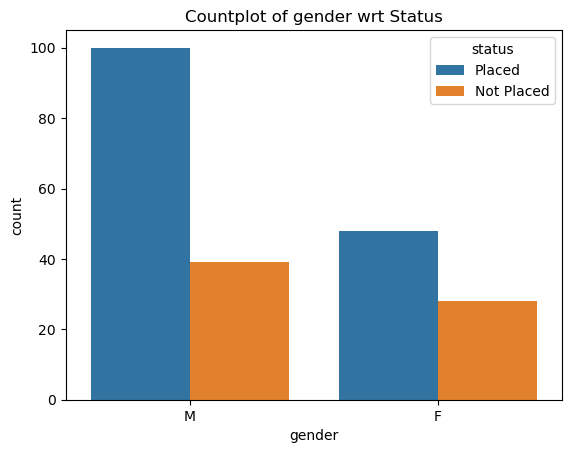

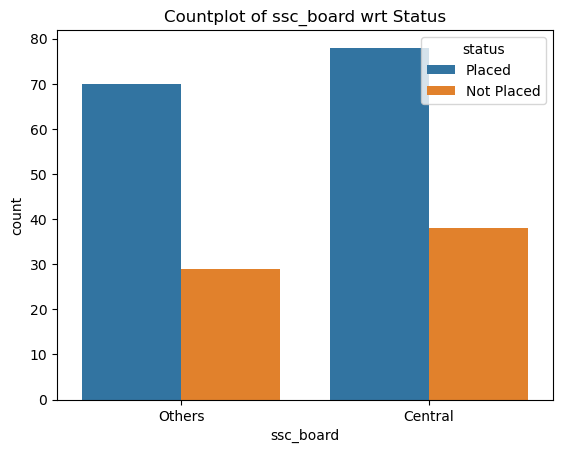

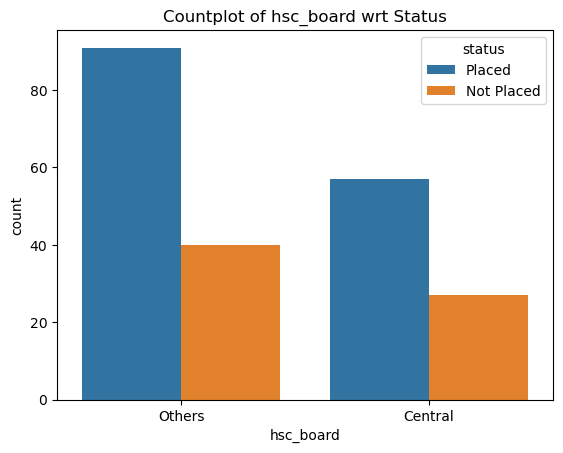

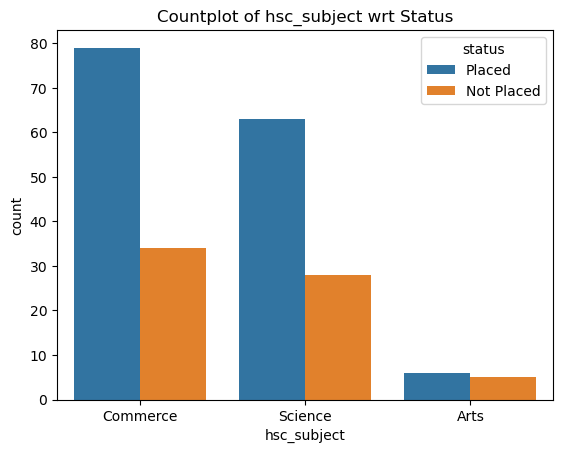

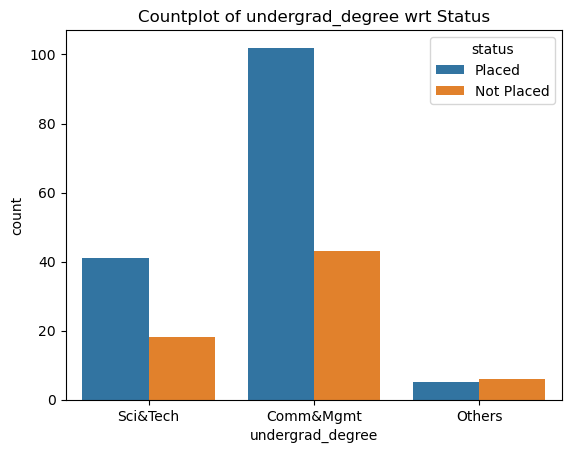

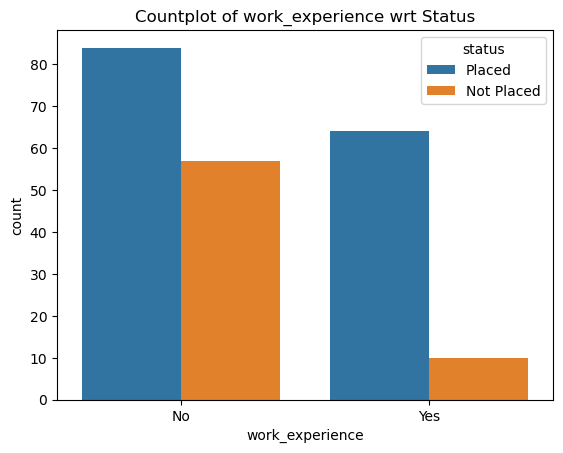

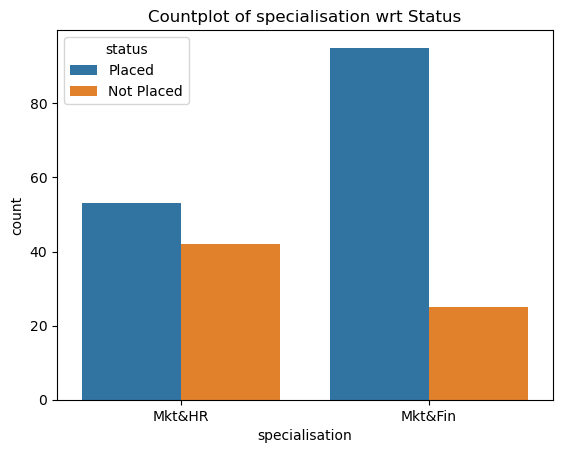

In [12]:
for i in cat_cols[:-1]:
    sns.countplot(x=df[i],hue=df['status'])
    plt.title(f'Countplot of {i} wrt Status')
    plt.show()

In [15]:
print(num_cols)

Index(['ssc_percentage', 'hsc_percentage', 'degree_percentage',
       'emp_test_percentage', 'mba_percent'],
      dtype='object')


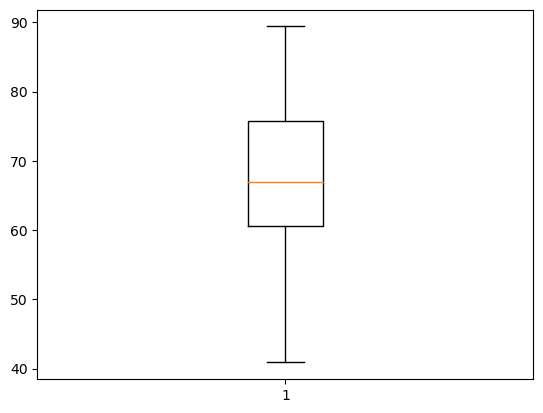

In [17]:
plt.boxplot(df['ssc_percentage'])
plt.show()

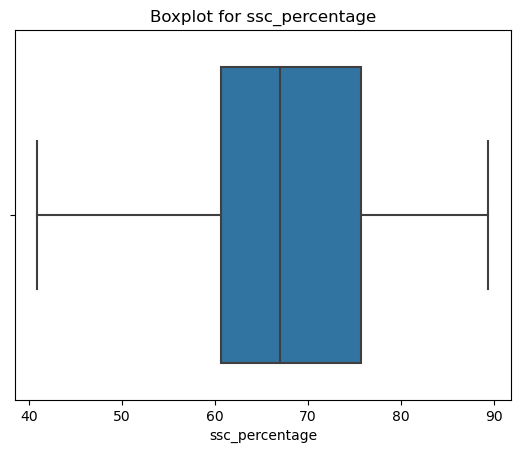

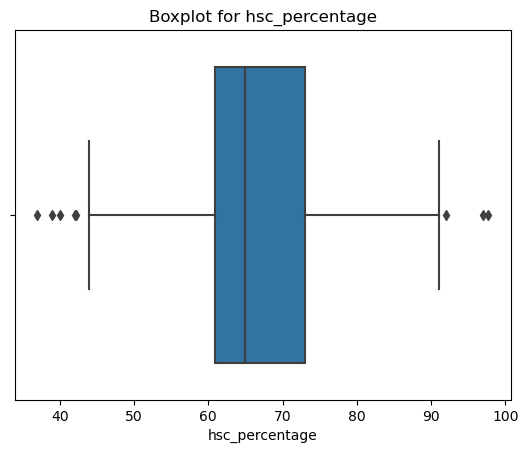

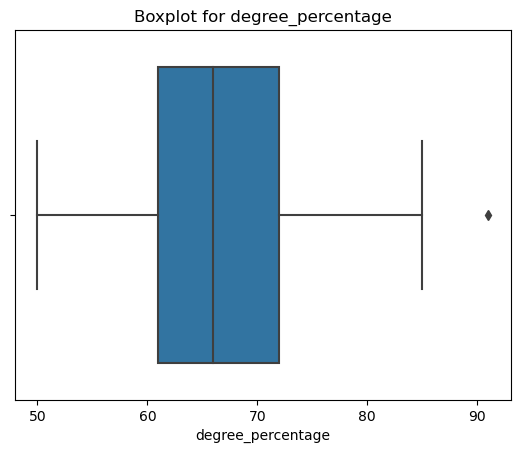

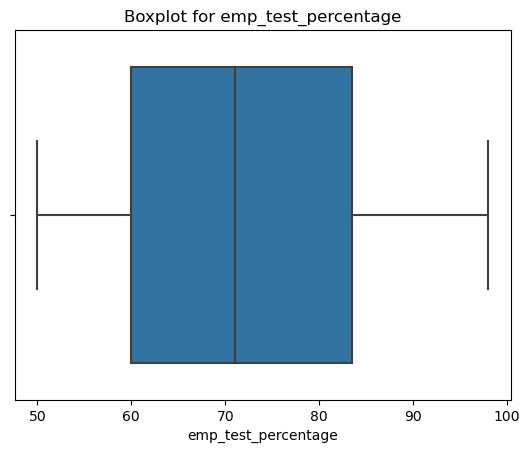

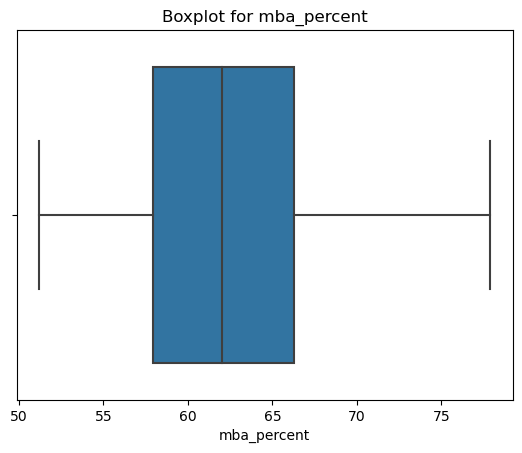

In [21]:
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

#### Steps in Pipeline
<pre>
1) Missing Value Imputation
2) Encoding
3) Outlier Treament
4) Scaling
5) Model Building
</pre>

In [23]:
x = df.drop('status',axis=1)
y = df['status']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(215, 12)
(215,)


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(161, 12)
(54, 12)
(161,)
(54,)


In [25]:
from sklearn.metrics import confusion_matrix,classification_report

In [27]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred))

### Pipeline

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [44]:
print(num_cols)
print(x_train.columns)
print(cat_cols)

Index(['ssc_percentage', 'hsc_percentage', 'degree_percentage',
       'emp_test_percentage', 'mba_percent'],
      dtype='object')
Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent'],
      dtype='object')
Index(['gender', 'ssc_board', 'hsc_board', 'hsc_subject', 'undergrad_degree',
       'work_experience', 'specialisation', 'status'],
      dtype='object')


### ColumnTransformer
1) We often need to apply different sets of tranformers to different groups of columns. For instance, we would want to apply OneHotEncoder to only categorical columns but not to numerical columns. This is where ColumnTransformer comes in

In [47]:
y_test.value_counts()

Placed        37
Not Placed    17
Name: status, dtype: int64

### LogReg

In [80]:
step1 = ColumnTransformer(transformers =
                         [('enc_col',OneHotEncoder(drop='first',sparse=False),[0,2,4,5,7,8,10]),
                         ('robust_scale',RobustScaler(),[3])],
                         remainder='passthrough')

step2 = LogisticRegression(max_iter=1000)

pipe_lr = Pipeline([('step1',step1),('step2',step2)])

pipe_lr.fit(x_train,y_train)

ypred_lr = pipe_lr.predict(x_test)

eval_model(y_test,ypred_lr)

[[11  6]
 [ 3 34]]
              precision    recall  f1-score   support

  Not Placed       0.79      0.65      0.71        17
      Placed       0.85      0.92      0.88        37

    accuracy                           0.83        54
   macro avg       0.82      0.78      0.80        54
weighted avg       0.83      0.83      0.83        54



### KNN

In [79]:
step2 = KNeighborsClassifier(n_neighbors=11)

pipe_knn = Pipeline([('step1',step1),('step2',step2)])

pipe_knn.fit(x_train,y_train)

ypred_knn = pipe_knn.predict(x_test)

eval_model(y_test,ypred_knn)

[[ 6 11]
 [ 3 34]]
              precision    recall  f1-score   support

  Not Placed       0.67      0.35      0.46        17
      Placed       0.76      0.92      0.83        37

    accuracy                           0.74        54
   macro avg       0.71      0.64      0.65        54
weighted avg       0.73      0.74      0.71        54



### DT

In [78]:
step2 = DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_split=12,random_state=0)

pipe_dt = Pipeline([('step1',step1),('step2',step2)])


pipe_dt.fit(x_train,y_train)

ypred_dt = pipe_dt.predict(x_test)

eval_model(y_test,ypred_dt)

[[ 9  8]
 [11 26]]
              precision    recall  f1-score   support

  Not Placed       0.45      0.53      0.49        17
      Placed       0.76      0.70      0.73        37

    accuracy                           0.65        54
   macro avg       0.61      0.62      0.61        54
weighted avg       0.67      0.65      0.65        54



### RF

In [77]:
step2 = RandomForestClassifier(n_estimators=120,criterion='gini',max_depth=7,min_samples_split=10,random_state=0)

pipe_rf = Pipeline([('step1',step1),('step2',step2)])

pipe_rf.fit(x_train,y_train)

ypred_rf = pipe_rf.predict(x_test)

eval_model(y_test,ypred_rf)

[[ 7 10]
 [ 3 34]]
              precision    recall  f1-score   support

  Not Placed       0.70      0.41      0.52        17
      Placed       0.77      0.92      0.84        37

    accuracy                           0.76        54
   macro avg       0.74      0.67      0.68        54
weighted avg       0.75      0.76      0.74        54



### Saving the Model

In [81]:
import pickle

In [82]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [83]:
pickle.dump(pipe_lr,open('lr.pkl','wb')) # saving the best performing model
pickle.dump(df,open('df.pkl','wb'))    # saving the dataframe

In [85]:
for i in num_cols:
    print(f'Feature {i}')
    print(df[i].nunique())
    print('*'*40)

Feature ssc_percentage
103
****************************************
Feature hsc_percentage
97
****************************************
Feature degree_percentage
89
****************************************
Feature emp_test_percentage
100
****************************************
Feature mba_percent
205
****************************************


In [ ]:
# M 	56.00 	Central 	52.00 	Central 	Science 	52.00 	Sci&Tech 	No 	66.0 	Mkt&HR 	59.43 	Not Placed